&^&^&^&^
0.9854699601011091


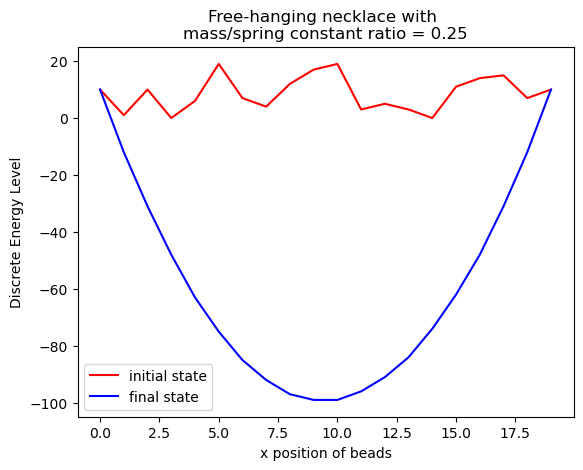

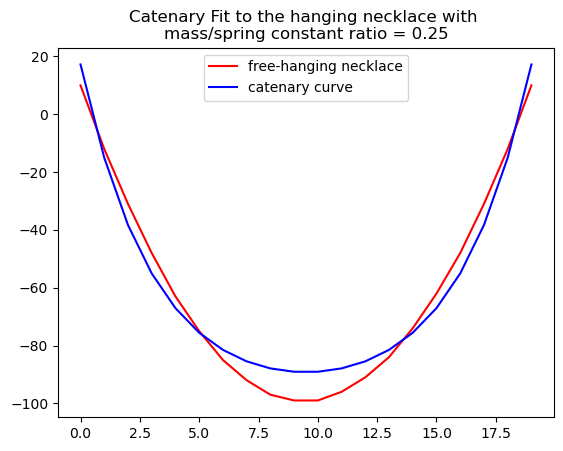

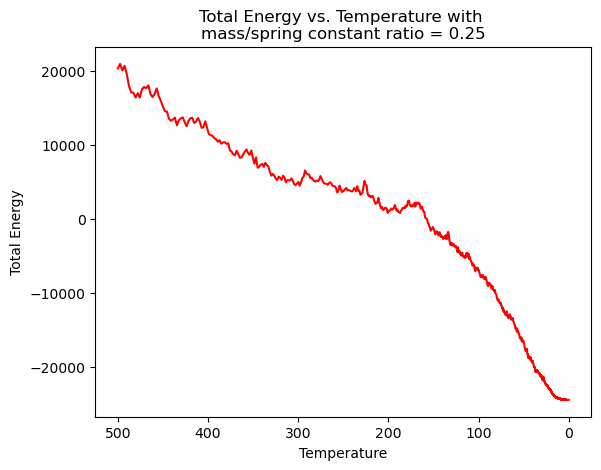

In [6]:
#Solving the necklace problem
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.stats import linregress
#from scipy.constants import g

# set random seed
np.random.seed(4132)

# define initial state
state_0 = np.random.randint(0,21,size=20)

# lock end beads in the middle
state_0[0]  = 10
state_0[19] = 10
initial = np.copy(state_0)

# define mass of beads, spring constant, gravitational acceleration
#this is what affects the shape of the graph (ratio)
m = 2.5*2 #*4 for .666
#k = 15*2
k = 20
g = 9.81
#change m/k ratio to change eqiulibrium
# print(m/k)

# define move function
# the argument is the indexed state array not the entire array
def move(state):
    # random move up or down by 1
    randval = np.random.random()
    if randval < 0.5:
        new_state = state + 1
    else:
        new_state = state - 1

    return new_state

# define cost function
# total energy of the system of hanging masses and springs
def E(state):
    # grav potential energy
    Egrav = m * g * state.sum()

    # elastic potential energy
    Eelastic = 0
    for i in range(state.size-1):
        Eelastic += 0.5 * k * (np.abs(state[i]-state[i+1]))**2

    return Egrav + Eelastic

# define function for simulated annealing
def anneal(state, T0, Tf):
    # set temperature for each iteration of moves
    T = T0
    # initialize temperature and total energy lists
    T_list = []
    E_list = []
    while T > Tf:
        T_list.append(T)
        E_list.append(E(state))
        # move beads ***NOT THE FIXED ENDS***
        for i in range(1, len(state)-1):
            # calculate initial energy of state
            E_0 = E(state)

            # copy state array to check energy of new possible state
            copy_state = np.copy(state)

            # get new state
            new_state = move(state[i])
            copy_state[i] = new_state

            # determine acceptance of the move
            # calculate energy of new_state
            E_f = E(copy_state)

            if E_f < E_0:
                state[i] = new_state

            else:
                prob = np.random.random()
                if prob < np.exp(-abs(E_f - E_0)/T):
                    state[i] = new_state
                else:
                    state[i] = state[i]

        # decrease T
        T = 0.995*T

    return state, T_list, E_list

# do the annealing starting with a random state
state_f, T_list, E_list = anneal(state_0, 500, .1)


'''
fit the positions of the necklace with an actual catenary
using the cosh function
'''

def catenary(x, a, b):
    return a * np.cosh((x-9.5)*b/a)-100

x_data = np.zeros(20)

for i in range(x_data.size):
    x_data[i] = i

popt, pcov = curve_fit(catenary, x_data, state_f, [.03, .05], maxfev=4000)

y_catenary = catenary(x_data, *popt)

ss, iii, R, ppp, stderr = linregress(y_catenary, state_f)

ratio = round(m/k, 5)

print("&^&^&^&^")
print(R)

# plot necklace
# cs = {'fontname':'Times New Roman'}
plt.plot(initial, color='r', label = 'initial state')
plt.plot(state_f, color='b', label = 'final state')
plt.title('Free-hanging necklace with \nmass/spring constant ratio = ' + str(ratio))
plt.legend()
plt.xlabel('x position of beads')
plt.ylabel('Discrete Energy Level')
plt.show()
#plt.savefig('necklace')
#plt.close()


# plot necklace with catenary fit
plt.plot(state_f, color='r', label='free-hanging necklace')
plt.plot(y_catenary, color='b', label = 'catenary curve')
plt.title('Catenary Fit to the hanging necklace with \nmass/spring constant ratio = ' + str(ratio))
plt.legend()
plt.show()
#plt.savefig('fit_necklace')
#plt.close()


# plot energy vs temperature
fig, ax = plt.subplots()
plt.plot(T_list, E_list, color='r')
plt.title('Total Energy vs. Temperature with \nmass/spring constant ratio = ' + str(ratio))
plt.xlabel('Temperature')
plt.ylabel('Total Energy')
ax.invert_xaxis()

plt.show()
#plt.savefig('EnergyVtemp')
#plt.close()

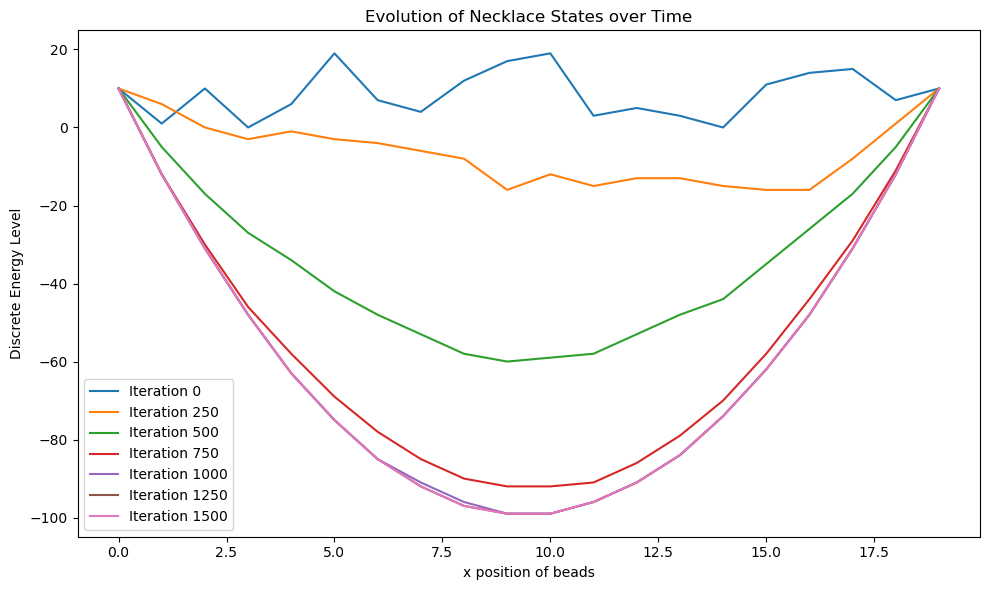

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

# set random seed
np.random.seed(4132)

# Define functions and parameters (same as before)

# Modified anneal function to store states at specific intervals
def anneal(state, T0, Tf, interval=250):
    T = T0
    T_list = []
    E_list = []
    states_list = [np.copy(state)]  # Store initial state
    while T > Tf:
        T_list.append(T)
        E_list.append(E(state))
        for i in range(1, len(state)-1):
            E_0 = E(state)
            copy_state = np.copy(state)
            new_state = move(state[i])
            copy_state[i] = new_state
            E_f = E(copy_state)
            if E_f < E_0:
                state[i] = new_state
            else:
                prob = np.random.random()
                if prob < np.exp(-abs(E_f - E_0)/T):
                    state[i] = new_state
                else:
                    state[i] = state[i]
        T = 0.995*T
        # Store state at intervals
        if len(T_list) % interval == 0:
            states_list.append(np.copy(state))
    return states_list, T_list, E_list

# Define the initial state and parameters
state_0 = np.random.randint(0, 21, size=20)
state_0[0] = 10  # Lock end beads in the middle
state_0[19] = 10
m = 2.5 * 2  # Mass of beads
k = 20  # Spring constant
g = 9.81  # Gravitational acceleration

# Perform annealing
max_iterations = 1000
states_list, T_list, E_list = anneal(state_0, 500, 0.1, interval=250)

# Plotting all states in a single subplot
plt.figure(figsize=(10, 6))
for i, state in enumerate(states_list):
    plt.plot(state, label=f'Iteration {i * 250}')
plt.title('Evolution of Necklace States over Time')
plt.xlabel('x position of beads')
plt.ylabel('Discrete Energy Level')
plt.legend()
plt.tight_layout()

# Save the plot as an image
plt.savefig('necklace_evolution.png')

# Show the plot
plt.show()


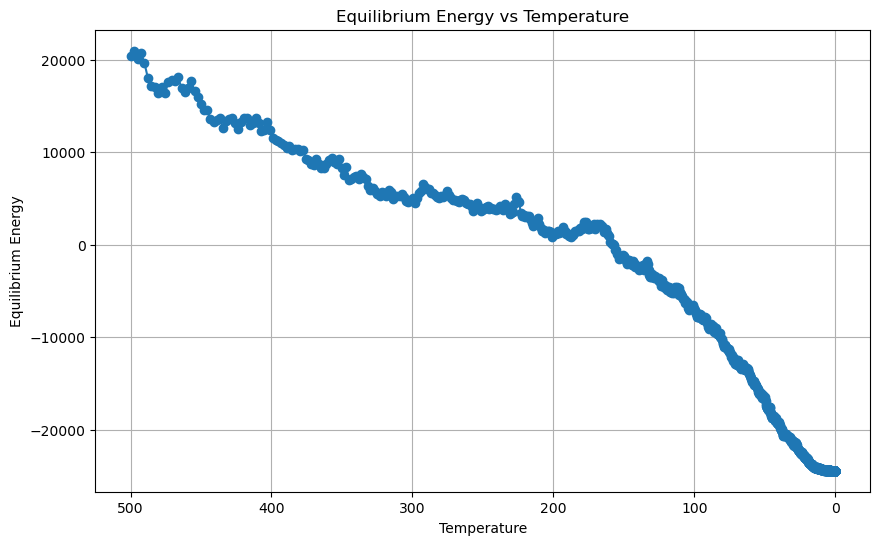

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

# set random seed
np.random.seed(4132)

# Define functions and parameters (same as before)

# Modified anneal function to record energy at each temperature step
def anneal_energy(state, T0, Tf, interval=100):
    T = T0
    T_list = []
    E_list = []
    while T > Tf:
        T_list.append(T)
        E_list.append(E(state))
        for i in range(1, len(state)-1):
            E_0 = E(state)
            copy_state = np.copy(state)
            new_state = move(state[i])
            copy_state[i] = new_state
            E_f = E(copy_state)
            if E_f < E_0:
                state[i] = new_state
            else:
                prob = np.random.random()
                if prob < np.exp(-abs(E_f - E_0)/T):
                    state[i] = new_state
                else:
                    state[i] = state[i]
        T = 0.995*T
    return T_list, E_list

# Define the initial state and parameters
state_0 = np.random.randint(0, 21, size=20)
state_0[0] = 10  # Lock end beads in the middle
state_0[19] = 10
m = 2.5 * 2  # Mass of beads
k = 20  # Spring constant
g = 9.81  # Gravitational acceleration

# Perform annealing to record energy at each temperature step
T_list, E_list = anneal_energy(state_0, 500, 0.1, interval=100)

# Plot equilibrium energy versus temperature
plt.figure(figsize=(10, 6))
plt.plot(T_list, E_list, marker='o', linestyle='-')
plt.title('Equilibrium Energy vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Equilibrium Energy')
plt.grid(True)
plt.gca().invert_xaxis()  # Reverse x-axis

# Save the plot as an image
plt.savefig('necklace_energy.png')

plt.show()


C:\Users\rkesh\AppData\Local\Temp\ipykernel_29444\2691172555.py:7: RuntimeWarning: overflow encountered in cosh
  return a * np.cosh((x - 9.5) * b / a) - 100


Fitted Catenary Model:
a = 10.75107710268097
b = 3.4818826756683667


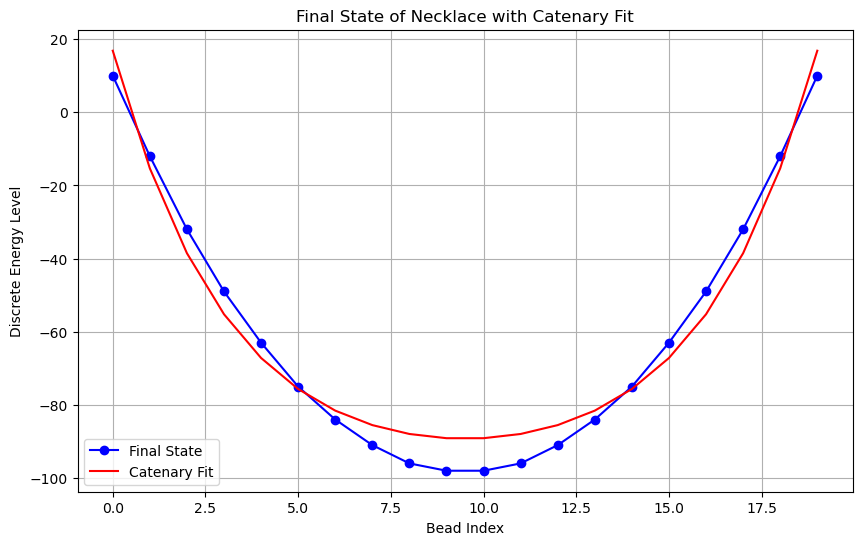

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the catenary function
def catenary(x, a, b):
    return a * np.cosh((x - 9.5) * b / a) - 100

# Modified anneal function to store states at specific intervals
def anneal(state, T0, Tf, interval=250):
    T = T0
    T_list = []
    E_list = []
    states_list = [np.copy(state)]  # Store initial state
    while T > Tf:
        T_list.append(T)
        E_list.append(E(state))
        for i in range(1, len(state)-1):
            E_0 = E(state)
            copy_state = np.copy(state)
            new_state = move(state[i])
            copy_state[i] = new_state
            E_f = E(copy_state)
            if E_f < E_0:
                state[i] = new_state
            else:
                prob = np.random.random()
                if prob < np.exp(-abs(E_f - E_0)/T):
                    state[i] = new_state
                else:
                    state[i] = state[i]
        T = 0.995*T
        # Store state at intervals
        if len(T_list) % interval == 0:
            states_list.append(np.copy(state))
    return states_list, T_list, E_list

# Define the initial state and parameters
state_0 = np.random.randint(0, 21, size=20)
state_0[0] = 10  # Lock end beads in the middle
state_0[19] = 10

# Perform annealing
max_iterations = 1000
states_list, T_list, E_list = anneal(state_0, 500, 0.1, interval=250)

# Extract the final state
state_f = states_list[-1]

# Define x positions of beads
x_data = np.arange(len(state_f))

# Fit the final state data to the catenary function
popt, pcov = curve_fit(catenary, x_data, state_f, p0=[10, 0.1])

# Generate y values using the fitted catenary function
y_catenary = catenary(x_data, *popt)

# Print the fitted model
print("Fitted Catenary Model:")
print("a =", popt[0])
print("b =", popt[1])

# Plot the final state and the fitted catenary function
plt.figure(figsize=(10, 6))
plt.plot(x_data, state_f, 'bo-', label='Final State')
plt.plot(x_data, y_catenary, 'r-', label='Catenary Fit')
plt.title('Final State of Necklace with Catenary Fit')
plt.xlabel('Bead Index')
plt.ylabel('Discrete Energy Level')
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('necklace_fit.png')

plt.show()
